<a href="https://colab.research.google.com/github/vel688/KNN-AND-NAIVE-BAYES-CLASSIFICATION/blob/main/SPAM_MESSAGES_USING_NAIVE_BAYES_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NAIVE BAYES CLASSIFICATION

##Specifying the question

Build a model that filters email messages, detecting whether it is a spam or not a spam


##Understanding context
Spams is a known problem to email users. Sending spam emails is one of the easiest forms of advertising and hence a useful medium of communication like email, is abused by spammers to send junk email.

Unsolicited emails are a menace to the users and a big threat to cybersecurity.

There is a need to develop an antispam solution. 


##Data relevance
The data provided is considered relevant because it countains word counts of spam and non spam messages which are useful to build the model.

##Success Criteria
Success will have been achieved if the model has an accuracy of above 80% and the lowest possible error.

##Experimental design
Loading and understandng data.

Cleaning data.

Experimental Data Analysis( univariate, bivariate, multivariate).

Preparing data.

Modeling.

Implementing model.




#Loading and understanding data

In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import decomposition
from imblearn.over_sampling import RandomOverSampler
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
#load data
data = pd.read_csv('spambase.data', header =  None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [10]:
data.shape
#there rae 4600 rows and 58 columns

(4601, 58)

In [11]:
#check types
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55      int64
56      int64
57      int64
dtype: object

Assumptions:


1.All the values are floats, I assume the emails have been tokenised, stemmed and then counted.

2.I was unable to find the description of the data so i will assume the columns are characteristics of the specific messages and words which are still relevant.I will use indices for labelling the columns.

3.The last column is assumed to be spam or not spam because it the values are in 0 or 1.  1 for spam, 0 for ham(not spam)

#Data cleaning

In [12]:
#Check for null values
data.isnull().sum()

#there are no null values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

In [13]:
#check for duplicates
dup=data.duplicated().sum()
print(dup)

391


In [14]:
#Drop duplicates but retain the originals
data.drop_duplicates(keep='first', inplace = True)
data.shape

(4210, 58)

In [15]:
#Check for anomalies

q11 = data[1].quantile(.25)
q31 = data[1].quantile(.75)

iqr11 = q31 - q11
iqr11
##
q11, q31 = np.percentile(data[1], [25, 75]) 

iqr = q31 - q11

l_bound = q11 - (1.5*iqr)
u_bound = q31 + (1.5 * iqr)

print(iqr11, iqr)

#There are no anomalies

0.0 0.0


#Exploratory data analysis

##a)Univariate

In [16]:
#Frequency distribution
for var in data.columns:
  print(data[var].value_counts())

0.00    3228
0.10      40
0.09      35
0.17      34
0.08      31
        ... 
1.36       1
2.85       1
1.09       1
1.88       1
1.49       1
Name: 0, Length: 142, dtype: int64
0.00    3399
0.08      24
0.19      24
0.10      23
0.17      22
        ... 
1.51       1
1.57       1
2.70       1
1.15       1
1.49       1
Name: 1, Length: 171, dtype: int64
0.00    2426
0.32      44
0.29      37
0.55      36
0.36      28
        ... 
2.06       1
2.22       1
1.57       1
4.34       1
1.62       1
Name: 2, Length: 214, dtype: int64
0.00     4164
0.21        2
0.58        2
0.42        2
0.17        2
0.04        1
0.06        1
19.73       1
9.16        1
0.15        1
0.11        1
0.10        1
0.95        1
0.81        1
0.44        1
7.07        1
7.18        1
0.52        1
0.49        1
0.19        1
1.26        1
1.29        1
1.35        1
0.91        1
0.31        1
0.14        1
1.16        1
40.13       1
4.31        1
35.46       1
13.63       1
0.55        1
0.57        1
1.33

##b)Bivariate



In [17]:
#Pearson correlation
corr = data.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
1,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
2,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
3,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
4,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
5,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0.089520,-0.050811,-0.067771,-0.048898,-0.048262,-0.046347,-0.036525,-0.035031,-0.037089,-0.055394,-0.054298,-0.060609,-0.018420,-0.049223,-0.027722,-0.030898,-0.056541,-0.037610,-0.030174,-0.057469,-0.034364,-0.014740,-0.033478,-0.021744,-0.011584,-0.016729,0.058121,0.105927,0.020413,-0.013554,0.065709,0.063403,0.212311
6,0.011061,0.077374,0.028581,0.014289,0.135957,0.046868,1.000000,0.033692,0.049238,0.055695,0.186794,-0.008437,0.003165,-0.023818,0.037437,0.135875,0.189654,0.115447,0.102589,0.049675,0.143770,-0.002935,0.068443,0.034547,-0.094994,-0.084666,-0.060458,-0.070265,-0.050260,-0.061300,-0.047897,-0.042702,-0.043017,-0.043140,-0.055209,-0.057351,-0.055920,-0.015446,-0.049424,-0.019709,-0.035875,-0.052009,-0.053141,-0.036292,-0.057273,-0.059125,-0.018173,-0.033250,-0.034080,-0.061318,-0.029466,0.050992,0.067236,0.049306,

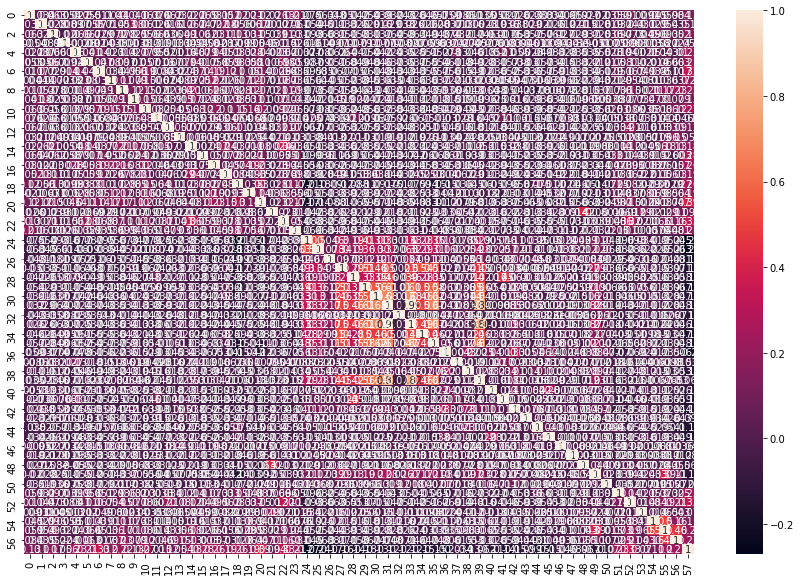

In [18]:
#visualizing correlation on a heatmap
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()

It is impossible to interpret the heatmap, let us just use the correlation table above. 

When the value of the correlation coefficient is close to zero, generally between -0.1 and +0.1, 
 the variables are said to have no linear relationship or a very weak linear relationship.

 Correlation coefficients between -.20 and .20 are generally considered weak, 
 between .20 and .50 (positive or negative) are considered moderate, 
 and above .50 (positive or negative) are considered strong.

There is varied correlation among the variables in our data, ranging from high to low.

##c)Multivariate

I was not able to carry out multivariate analysis because of lack of the column names for selection

#Modeling

##Multinomial Classification

In [19]:
#confirm the last column is spam or ham 
check_y= data.iloc[:, -1:]
check_y

,57
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [20]:
#confirm selection for the other columns
check_x= data.iloc[:, :-1]
check_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [32]:
from sklearn.model_selection import train_test_split
# Splitting the dataset x and y..
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values

#First split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
#Scaling our data
from sklearn.preprocessing import StandardScaler
mscaler = StandardScaler()
mscaler.fit(X_train)

X_train = mscaler.transform(X_train)
X_test = mscaler.transform(X_test)

In [36]:
from sklearn.naive_bayes import MultinomialNB
model =  MultinomialNB()
model.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

Model is unable to fit because of the error. For this reason, we shall try the other naive bayes methods of classification.

##Gaussian Naive Bayes Classification

In [38]:
model2 = GaussianNB()  
model2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
# Making predictions
predicted = model2.predict(X_test)

In [42]:
# Accuracy
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
 
#The accuracy is at 82%

[[715 279]
 [ 24 666]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       994
           1       0.70      0.97      0.81       690

    accuracy                           0.82      1684
   macro avg       0.84      0.84      0.82      1684
weighted avg       0.86      0.82      0.82      1684



In [45]:
#Second split
#Use same data, differrent variable names
A = data.iloc[:, :-1].values
b = data.iloc[:, -1:].values
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=0)

In [46]:
model3 = GaussianNB()  
model3.fit(A_train, b_train)
predicted = model3.predict(A_test)
print(confusion_matrix(b_test, predicted))
print(classification_report(b_test, predicted))

#accuracy is now 83%

[[541 196]
 [ 14 512]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.84       737
           1       0.72      0.97      0.83       526

    accuracy                           0.83      1263
   macro avg       0.85      0.85      0.83      1263
weighted avg       0.87      0.83      0.83      1263



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
#third split
#Use same data, differrent variable names
W = data.iloc[:, :-1].values
z = data.iloc[:, -1:].values
W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.4, random_state=0)

In [48]:
model4 = GaussianNB()  
model4.fit(W_train, z_train)
predicted = model4.predict(W_test)
print(confusion_matrix(z_test, predicted))
print(classification_report(z_test, predicted))

#accuracy is still 83%

[[735 259]
 [ 24 666]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       994
           1       0.72      0.97      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.87      0.83      0.83      1684



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
#fourth split
#Use same data, differrent variable names
W = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values
W_train, W_test, y_train, y_test = train_test_split(W, y, test_size=0.5, random_state=0)

In [50]:
model5 = GaussianNB()  
model5.fit(W_train, y_train)
predicted = model4.predict(W_test)
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

#0.83 appears to be the optimum accuracy

[[915 324]
 [ 27 839]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      1239
           1       0.72      0.97      0.83       866

    accuracy                           0.83      2105
   macro avg       0.85      0.85      0.83      2105
weighted avg       0.87      0.83      0.83      2105



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Summary

split size 0.2 =  82% accuracy


split size 0.3, 0.4, 0.5 = 83% accuracy


#Conclusion
The best model to be used  is Gaussian with split size of 0.5 and accuracy 83% because it has the best metrics

#Recommendations.
1.Use Bernoulli Naive Bayes Classification and compare results.
 
2.Use other classification models and compare with Naive Bayes. Seek to find highest accuracy and other optimum metrics


3.Check for overfitting

#Final questions
1.Did we have the right data? Yes. However, the column name descriptions are needed next time.

2Was the project successful? Yes. The success criteria of an accuracy above 80% has been passed.